# WeatherPy
---

## Setup

In [21]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os  #for output
from scipy.stats import linregress
from pprint import pprint
from concurrent.futures import ThreadPoolExecutor, as_completed

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate List of Cities from `citipy`

In [22]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty list for holding the cities names
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## **Requirement 1:** Create Plots to Showcase the Relationship Between Weather Variables and Latitude
---

### Use OpenWeatherMap API to retrieve weather data from cities list

#### Longer way

In [25]:
# setup base url
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# empty list for city data collection
city_data = []

# indicate start of city data collection
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# run api request on each city in list
for city in cities:
    
    try:
        # setup query url for each city
        city_url = f"{base_url}&q={city}&units=metric"

        # get city's weather data
        weather_json = requests.get(city_url).json()

        # collect each city's data
        city_data.append({
            "City": city,
            "Country": weather_json['sys']['country'],
            "Date": weather_json['dt'],
            "Lat": weather_json['coord']['lat'],
            "Lng": weather_json['coord']['lon'],
            "Max Temp": weather_json['main']['temp_max'],
            "Humidity": weather_json['main']['humidity'],
            "Cloudiness": weather_json['clouds']['all'],
            "Wind Speed": weather_json['wind']['speed']
        })
    except:
        print(f"City, {city.title()}, not found. Skipping...")
    
    # pause to avoid rate limiting
    time.sleep(1)

# indicate end of city data collection
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

------------------------
Beginning Data Retrieval
------------------------
City, Puerto San Carlos, not found. Skipping...
City, Taiohae, not found. Skipping...
City, Bargara, not found. Skipping...
City, Vingt Cinq, not found. Skipping...
City, Tranovaho, not found. Skipping...
City, Kawthoung, not found. Skipping...
City, Miyanoura, not found. Skipping...
City, Ouellah, not found. Skipping...
City, Sishilichengzi, not found. Skipping...
City, Maubara, not found. Skipping...
City, Mukah, not found. Skipping...
City, Chicxulub Puerto, not found. Skipping...
City, Ocean Pointe, not found. Skipping...
City, Tanki Leendert, not found. Skipping...
City, Hihifo, not found. Skipping...
City, Fuvahmulah, not found. Skipping...
City, Nkurenkuru, not found. Skipping...
City, Cargados Carajos, not found. Skipping...
City, Toga Village, not found. Skipping...
City, Yangor, not found. Skipping...
City, Kulia Village, not found. Skipping...
City, 'Ibri, not found. Skipping...
City, Umatac Village, 

#### Faster way

In [26]:
# setup base url
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# empty list for city data collection
city_data = []

# define function to get city data
def get_city_data(city):
    try:
        # setup query url for city
        city_url = f"{base_url}&q={city}&units=metric"

        # add 1 second delay to avoid rate limiting
        time.sleep(1)

        # get city's weather data
        weather_json = requests.get(city_url).json()

        # return city's data
        return {
            "City": city,
            "Country": weather_json['sys']['country'],
            "Date": weather_json['dt'],
            "Lat": weather_json['coord']['lat'],
            "Lng": weather_json['coord']['lon'],
            "Max Temp": weather_json['main']['temp_max'],
            "Humidity": weather_json['main']['humidity'],
            "Cloudiness": weather_json['clouds']['all'],
            "Wind Speed": weather_json['wind']['speed']
        }
    except:
        # if city not found then show this and return nothing
        print(f"City, {city.title()}, not found. Skipping...")
        return None

# indicate start of city data collection
print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

# use ThreadpoolExecuter to parralize requests
with ThreadPoolExecutor(max_workers=5) as executor:
    
    # submit api request task for each city
    futures = [executor.submit(get_city_data, city) for city in cities]
 
    # run api request on each city in list
    for future in as_completed(futures):
        
        # retrieve data from the future object
        result = future.result()

        # if city's data exists then add to city_data
        if result:
            city_data.append(result)

# indicate end of city data collection
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

------------------------
Beginning Data Retrieval
------------------------
City, Puerto San Carlos, not found. Skipping...
City, Taiohae, not found. Skipping...
City, Bargara, not found. Skipping...
City, Vingt Cinq, not found. Skipping...
City, Tranovaho, not found. Skipping...
City, Kawthoung, not found. Skipping...
City, Miyanoura, not found. Skipping...
City, Ouellah, not found. Skipping...
City, Sishilichengzi, not found. Skipping...
City, Maubara, not found. Skipping...
City, Mukah, not found. Skipping...
City, Chicxulub Puerto, not found. Skipping...
City, Ocean Pointe, not found. Skipping...
City, Tanki Leendert, not found. Skipping...
City, Hihifo, not found. Skipping...
City, Fuvahmulah, not found. Skipping...
City, Nkurenkuru, not found. Skipping...
City, Cargados Carajos, not found. Skipping...
City, Toga Village, not found. Skipping...
City, Yangor, not found. Skipping...
City, Kulia Village, not found. Skipping...
City, 'Ibri, not found. Skipping...
City, Umatac Village, 

### Setup/export city data

In [27]:
# Convert city data into a dataframe
city_data_df = pd.DataFrame(city_data)

# display df
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,whitehorse,CA,1731395431,60.7161,-135.0538,-3.83,97,100,0.54
1,puerto natales,CL,1731396016,-51.7236,-72.4875,6.49,94,86,3.49
2,langtang,NG,1731396016,9.1333,9.7833,26.32,32,88,3.24
3,udachny,RU,1731396016,66.4167,112.4000,-17.58,98,100,1.91
4,koysinceq,IQ,1731396016,36.0821,44.6278,18.63,60,100,0.51


In [28]:
# show record count
city_data_df.count()

City          568
Country       568
Date          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
dtype: int64

In [ ]:
# output city dataframe

# define output folder path
output_path = ("../output_data")

# check if output folder exists and create it if it doesn't
os.makedirs(output_path, exist_ok=True)

# export city dataframe into a csv
city_data_df.to_csv(f"{output_path}/cities_data.csv", index_label="City_ID")

In [46]:
# read saved data
city_data_df = pd.read_csv(f"{output_path}/cities_data.csv", index_col="City_ID")

# display city data
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
City_ID,,,,,,,,,
0,whitehorse,CA,1731395431,60.7161,-135.0538,-3.83,97,100,0.54
1,puerto natales,CL,1731396016,-51.7236,-72.4875,6.49,94,86,3.49
2,langtang,NG,1731396016,9.1333,9.7833,26.32,32,88,3.24
3,udachny,RU,1731396016,66.4167,112.4000,-17.58,98,100,1.91
4,koysinceq,IQ,1731396016,36.0821,44.6278,18.63,60,100,0.51


### Create Scatter Plots Requested

#### Latitude vs. Tempurature

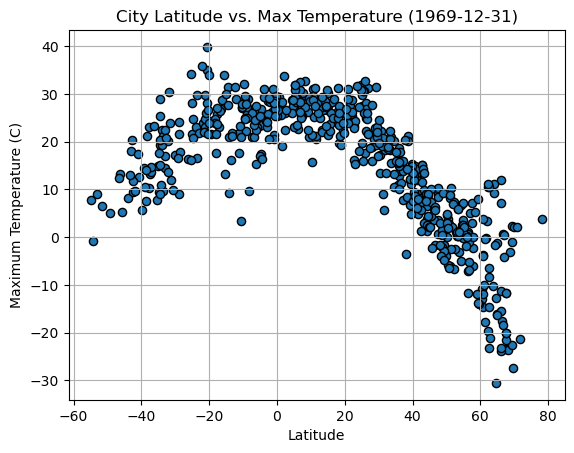

In [52]:
# get current date from first date value to display
current_date = pd.to_datetime(city_data_df.iloc[0, 5]).strftime('%Y-%m-%d')

# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', 
                  title=f'City Latitude vs. Max Temperature ({current_date})',
                  xlabel='Latitude', ylabel='Maximum Temperature (C)', 
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig1.png")

# show plot
plt.show()

### Latitude vs. Humidity

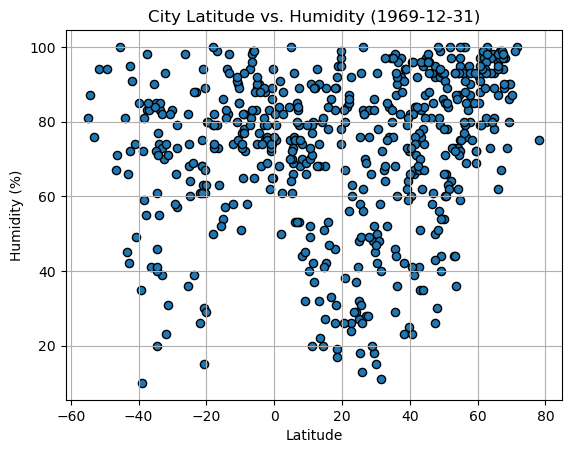

In [51]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',
                  title=f'City Latitude vs. Humidity ({current_date})',
                  xlabel='Latitude', ylabel='Humidity (%)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig2.png")

# show plot
plt.show()

### Latitude vs. Cloudiness

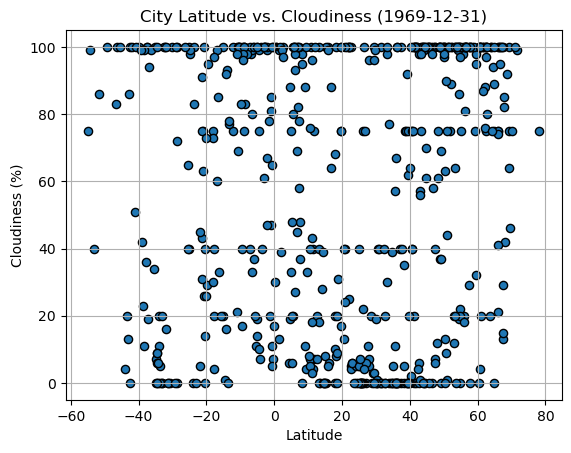

In [55]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness',
                  title=f'City Latitude vs. Cloudiness ({current_date})',
                  xlabel='Latitude', ylabel='Cloudiness (%)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig3.png")

# show plot
plt.show()

### Latitude vs. Wind Speed

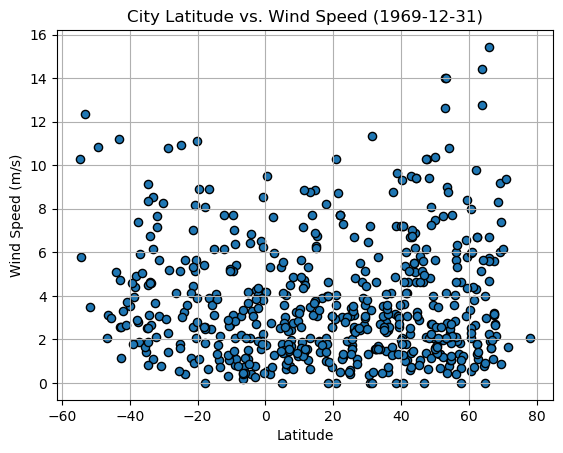

In [56]:
# create scatter plot with customization
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed',
                  title=f'City Latitude vs. Wind Speed ({current_date})',
                  xlabel='Latitude', ylabel='Wind Speed (m/s)',
                  grid=True, edgecolors='black', s=35)

# save figure
plt.savefig(f"{output_path}/Fig4.png")

# show plot
plt.show()